In [ ]:
import sys
import os

# Usar el directorio de trabajo actual en lugar de __file__
path = os.getcwd()
sys.path.insert(0, os.path.join(path, '..', 'src'))

import data_preparation as dp
import pandas as pd
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

In [ ]:
df = pd.read_csv(r'..\data\raw\base_train.csv',sep='|', encoding='utf-8')
import data_preparation as dp

cleaner = dp.DataCleaner()
df = cleaner.clean(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27959 entries, 0 to 28275
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   default       27959 non-null  int64   
 1   tipo_cliente  27959 non-null  object  
 2   trx39         27959 non-null  float64 
 3   trx102        27959 non-null  float64 
 4   trx106        27959 non-null  float64 
 5   trx143        27959 non-null  float64 
 6   trx158        27959 non-null  float64 
 7   disp309       27959 non-null  category
 8   CO01END010RO  27959 non-null  float64 
 9   CO01ACP017CC  27959 non-null  float64 
 10  CO02EXP011TO  27959 non-null  float64 
 11  CO02EXP004TO  27959 non-null  float64 
 12  CO01EXP001CC  27959 non-null  float64 
 13  CO01EXP003RO  27959 non-null  float64 
 14  CO02END015CC  27959 non-null  float64 
 15  CO01END002RO  27959 non-null  float64 
 16  CO01END086RO  27959 non-null  float64 
 17  CO01END094RO  27959 non-null  float64 
 18  CO02NUM086A

# EDA

📊 Distribución global de 'default':


,count,proportion
default,,
Cumple,26073,93.254408
Incumple,1886,6.745592


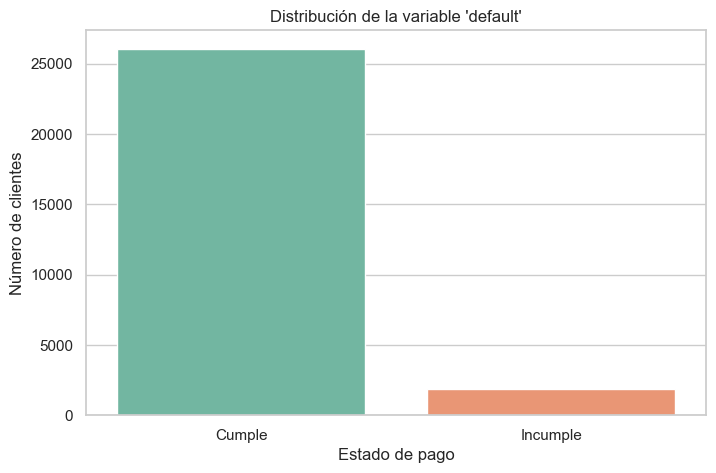

In [37]:
# === 1. Distribución global de la variable default
print("📊 Distribución global de 'default':")
dist = df['default'].value_counts().rename(index={0: 'Cumple', 1: 'Incumple'})
dist_pct = df['default'].value_counts(normalize=True).rename(index={0: 'Cumple', 1: 'Incumple'}) * 100
display(pd.concat([dist, dist_pct], axis=1).rename(columns={0: 'Conteo', 1: '%'}))

sns.countplot(data=df, x='default', palette='Set2')
plt.title("Distribución de la variable 'default'")
plt.xticks([0, 1], ['Cumple', 'Incumple'])
plt.xlabel("Estado de pago")
plt.ylabel("Número de clientes")
plt.show()

In [11]:
# === 2. Balanceo de clases
ratio = df['default'].mean()
print(f"\n📉 Proporción de clientes que incumplen (default=1): {ratio:.2%}")
if ratio < 0.1 or ratio > 0.9:
    print("⚠️ Dataset desbalanceado: considera usar técnicas como SMOTE, submuestreo o penalización.")
else:
    print("✅ Dataset razonablemente balanceado.")


📉 Proporción de clientes que incumplen (default=1): 6.75%
⚠️ Dataset desbalanceado: considera usar técnicas como SMOTE, submuestreo o penalización.


# Analisis bivariado


📊 Análisis de la variable 'CO01END086RO': Utilización promedio de productos


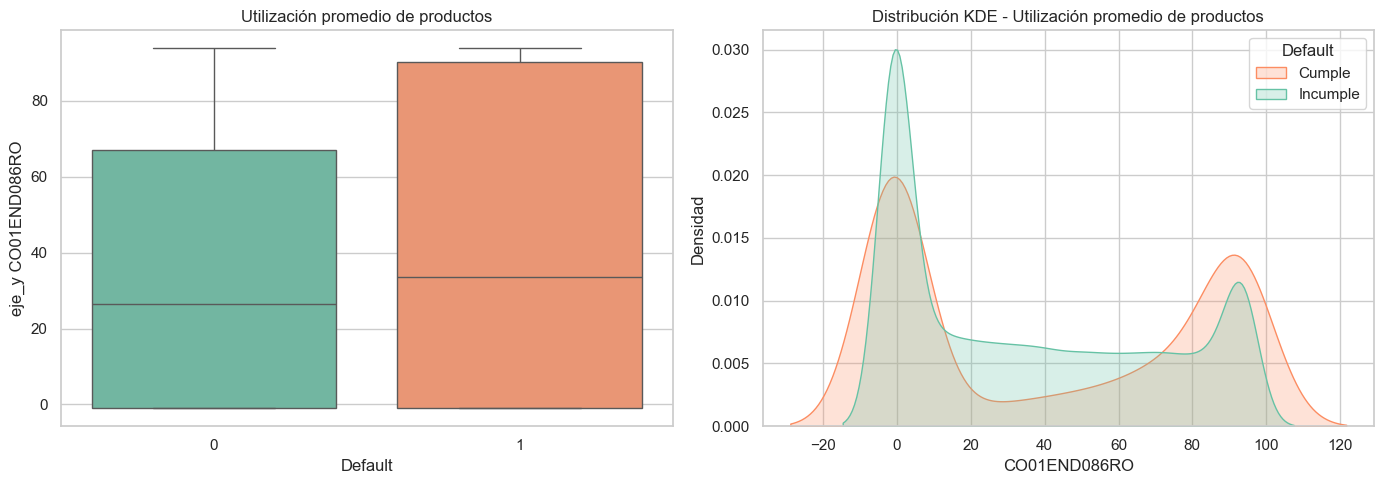

📈 Estadísticas descriptivas de 'CO01END086RO':


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,26073.0,35.122331,35.001920,-1.0,-1.0,26.420,67.1200,93.76
1,1886.0,41.103897,42.078754,-1.0,-1.0,33.665,90.0975,93.76





📊 Análisis de la variable 'CO02END015CC': % de cartera vencida en Telcos


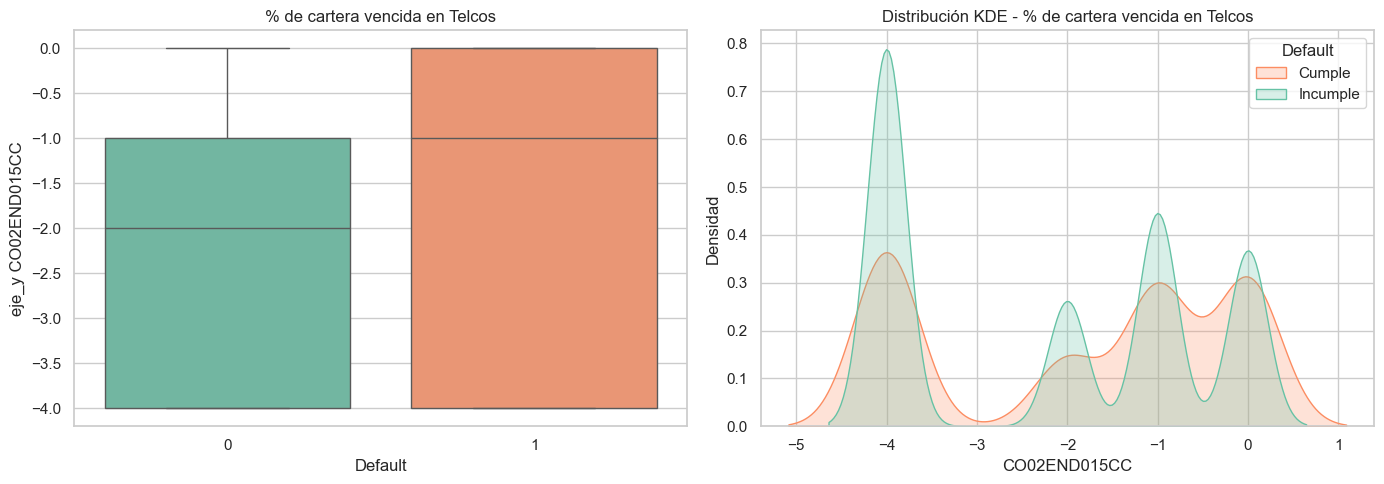

📈 Estadísticas descriptivas de 'CO02END015CC':


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,26073.0,-2.212365,1.635479,-4.0,-4.0,-2.0,-1.0,0.0
1,1886.0,-1.840933,1.634229,-4.0,-4.0,-1.0,0.0,0.0





📊 Análisis de la variable 'CO01EXP003RO': Antigüedad del crédito más viejo en rotativo


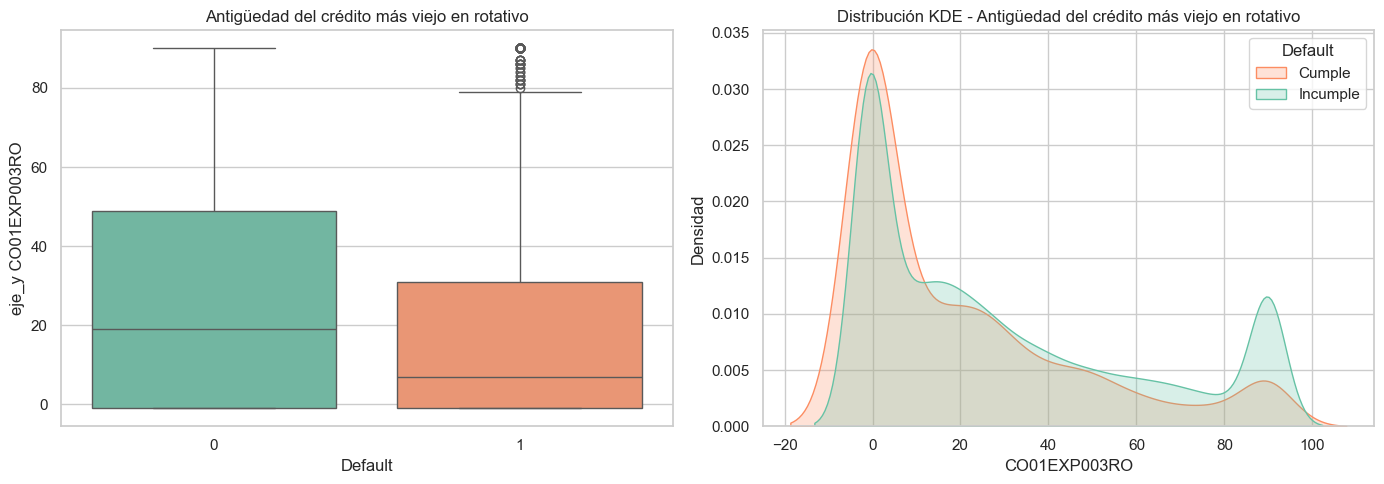

📈 Estadísticas descriptivas de 'CO01EXP003RO':


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,26073.0,28.929582,31.147608,-1.0,-1.0,19.0,49.0,90.0
1,1886.0,19.512195,26.641835,-1.0,-1.0,7.0,31.0,90.0





📊 Análisis de la variable 'CO02NUM043RO': Porcentaje de productos cerrados del total en el portafolio Rotativo


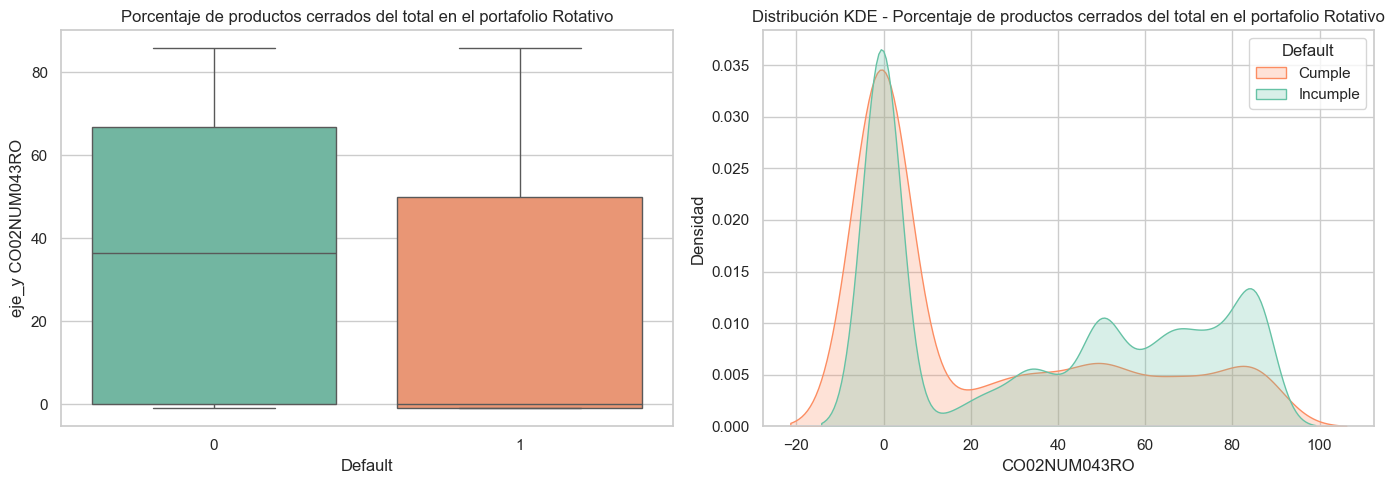

📈 Estadísticas descriptivas de 'CO02NUM043RO':


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,26073.0,35.867847,33.946079,-1.0,0.0,36.36,66.67,85.71
1,1886.0,22.180779,30.754306,-1.0,-1.0,0.00,50.00,85.71





📊 Análisis de la variable 'trx158': Retiro promedio por cajero


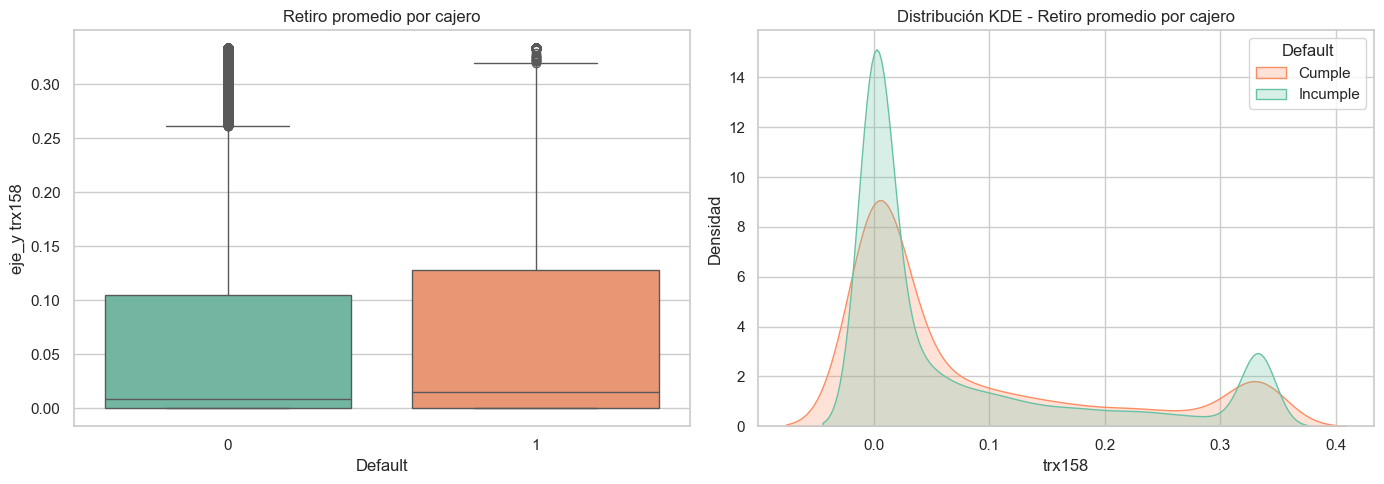

📈 Estadísticas descriptivas de 'trx158':


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,26073.0,0.073773,0.112692,0.0,0.0,0.008533,0.104534,0.33312
1,1886.0,0.080365,0.113908,0.0,0.0,0.014933,0.127913,0.33312


In [42]:
# Variables seleccionadas
# CO01END086RO	: Utilización promedio de productos → mide apalancamiento y riesgo operativo.
# CO02END015CC: % de cartera vencida en Telcos → refleja morosidad actual.
# CO01EXP003RO: Antigüedad del crédito más viejo en rotativo → perfil de madurez crediticia.
# CO01MOR098RO: Ponderación de buen comportamiento de pago → directamente ligado a scoring.
# trx158: Retiro promedio por cajero → posible proxy de liquidez/disposición de efectivo.


def plot_data(data,y, title):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.boxplot(data=df, x='default', y=y, palette='Set2', ax=axes[0])
    axes[0].set_title(f"{title}")
    axes[0].set_xlabel("Default")
    axes[0].set_ylabel(f"eje_y {y}")

    axes[1].set_title(f"Distribución KDE - {title}")
    sns.kdeplot(data=data, x=y, hue='default', fill=True, common_norm=False, palette='Set2', ax=axes[1])
    axes[1].set_xlabel(f"{y}")
    axes[1].set_ylabel("Densidad")
    axes[1].legend(title='Default', loc='upper right', labels=['Cumple', 'Incumple'])

    plt.tight_layout()
    plt.show()


dict = {
    'CO01END086RO': 'Utilización promedio de productos',
    'CO02END015CC': '% de cartera vencida en Telcos',
    'CO01EXP003RO': 'Antigüedad del crédito más viejo en rotativo',
    'CO02NUM043RO': 'Porcentaje de productos cerrados del total en el portafolio Rotativo',
    'trx158': 'Retiro promedio por cajero'
}
for col, title in dict.items():
    print(f"\n📊 Análisis de la variable '{col}': {title}")
    plot_data(df, col, title)
    print(f"📈 Estadísticas descriptivas de '{col}':")
    display(df.groupby('default')[col].describe())
    print("\n")

# Analisis multivariado

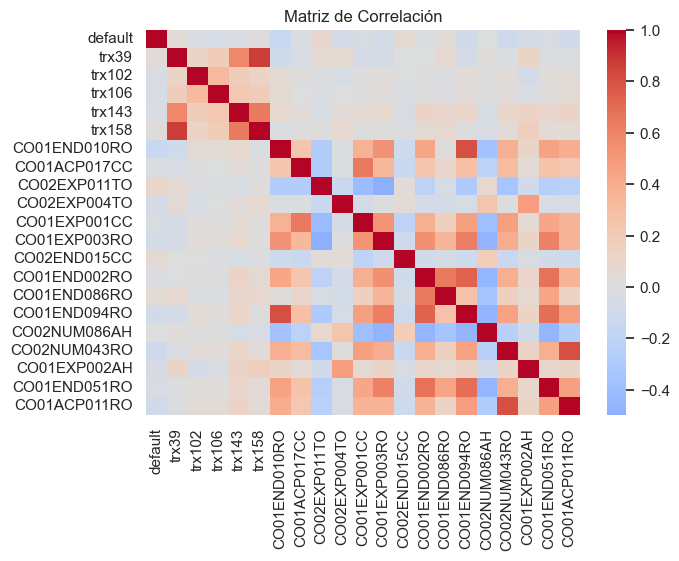

In [43]:
# Matriz de correlación
numeric_cols_v2 = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

corr_matrix = df[numeric_cols_v2].corr()

# Visualización con mapa de calor
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, center=0,) # nombre parametro para solo ver los valores de correlación : 
plt.title('Matriz de Correlación')
plt.show()


In [44]:
# Generamos el dataframe de pares: variable 1, variable 2 y la correlación entre ambas
corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'var1', 'level_1': 'var2', 0: 'correlation'})
)
corr_pairs['abs_correlation'] = corr_pairs['correlation'].abs()

corr_pairs[corr_pairs['abs_correlation'] > 0.5].sort_values(by='abs_correlation', ascending=False).head(10)

,var1,var2,correlation,abs_correlation
23,trx39,trx158,0.870476,0.870476
113,CO01END010RO,CO01END094RO,0.808856,0.808856
206,CO02NUM043RO,CO01ACP011RO,0.807005,0.807005
183,CO01END002RO,CO01END094RO,0.741603,0.741603
198,CO01END094RO,CO01END051RO,0.684294,0.684294
187,CO01END002RO,CO01END051RO,0.677687,0.677687
121,CO01ACP017CC,CO01EXP001CC,0.646452,0.646452
182,CO01END002RO,CO01END086RO,0.641498,0.641498
74,trx143,trx158,0.641359,0.641359
168,CO01EXP003RO,CO01END094RO,0.614314,0.614314
